# Libraries and Data

In [1]:
import face_recognition
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Dataset/data.csv')

In [3]:
data.head(10)

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [4]:
data_male=data[:100]
data_female=data[100:]

In [5]:
data_male.head(10)

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [6]:
data_female.head(10)

,image,height,weight,BMI
100,f_001,1.54,55,23.191095
101,f_002,1.55,55,22.892820
102,f_003,1.56,55,22.600263
103,f_004,1.55,55,22.892820
104,f_005,1.54,56,23.612751
105,f_006,1.55,56,23.309053
106,f_007,1.56,56,23.011177
107,f_008,1.54,54,22.769438
108,f_009,1.55,54,22.476587
109,f_010,1.56,54,22.189349


# EDA

Female Data Distribution

Text(0.5, 0, 'Height(m)')

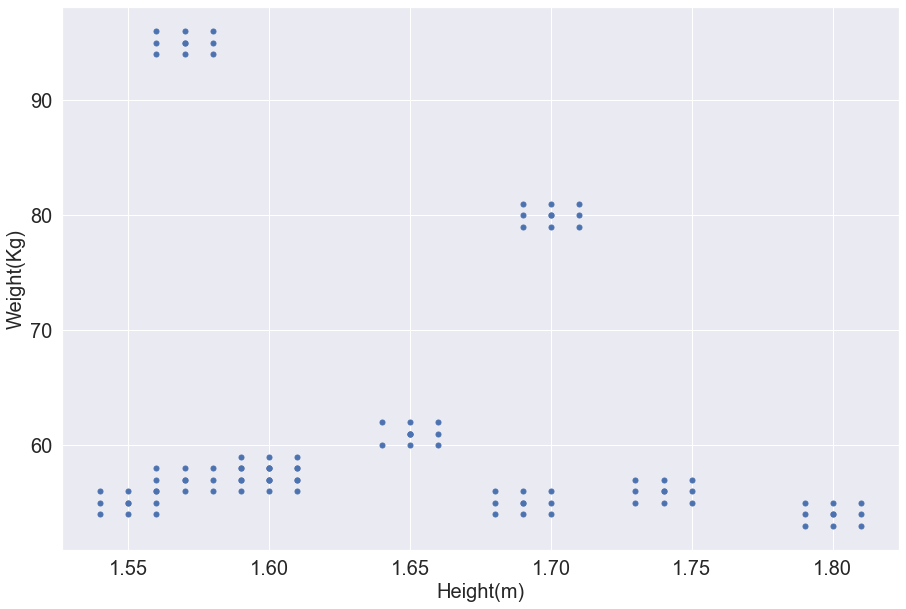

In [7]:
sns.set()
female_plot=data_female.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False,fontsize=20)
female_plot.set_ylabel('Weight(Kg)',fontsize=20)
female_plot.set_xlabel('Height(m)',fontsize=20)

In [8]:
print('Average Height = ' + str(round(data_female['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_female['weight'].mean(), 2)) + 'kg')

Average Height = 1.65m, Average Weight = 62.8kg


Text(0.5, 0, 'Height(m)')

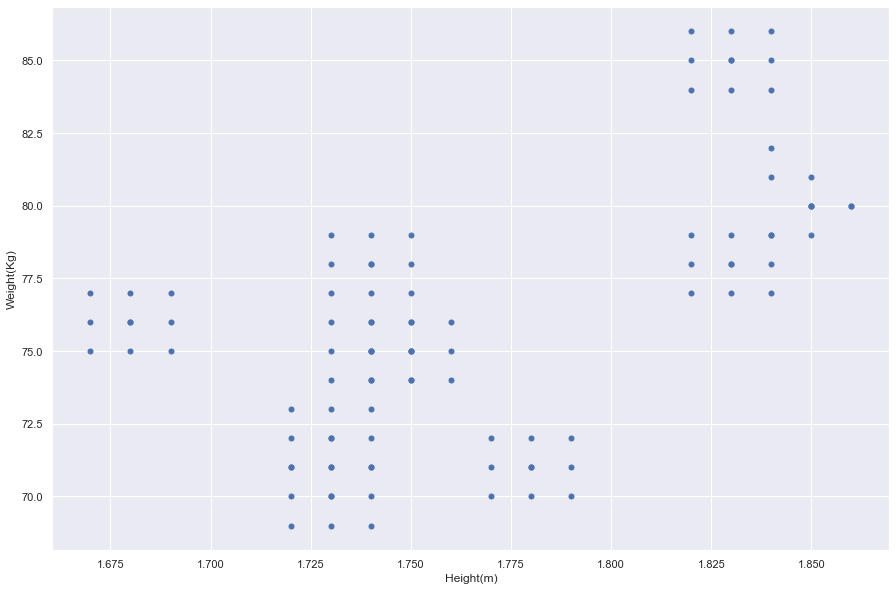

In [9]:
sns.set()
male_plot=data_male.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False)
male_plot.set_ylabel('Weight(Kg)')
male_plot.set_xlabel('Height(m)')

In [10]:
print('Average Height = ' + str(round(data_male['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_male['weight'].mean(), 2)) + 'kg')

Average Height = 1.77m, Average Weight = 76.02kg


# Feature Extraction

In [11]:
def encode_image(image_path):
    try:
        image=face_recognition.load_image_file(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=face_recognition.face_encodings(image)
    if not face_encoding:
        print("No Face Found at " + image_path)
        return np.zeros(128).tolist()
    return face_encoding[0].tolist()

converting all images to face encoding

In [12]:
face_data=[]
for image_name in data.image:
    face_encoding=encode_image("Dataset/images/" + image_name + ".jpg")
    face_data.append(face_encoding)

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data. 

In [13]:
X=np.array(face_data)
y_height=data.height.values
y_weight=data.weight.values
y_BMI=data.BMI.values
plotX=pd.DataFrame(X)

Dimensionality Reduction using PAC

[0.18996494 0.15258636]


Text(0.5, 0, 'PCA 2')

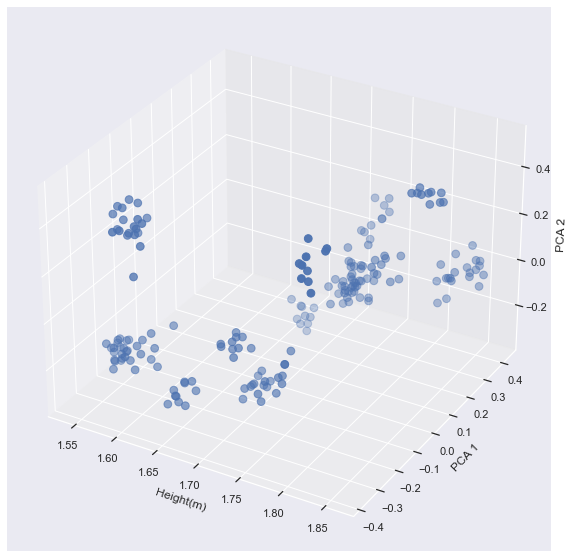

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(plotX)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca1 = principalDf['principal component 1'].tolist()
pca2 = principalDf['principal component 2'].tolist()
sns.set()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_height, pca1, pca2, s=60)
ax.set_xlabel('Height(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

Text(0.5, 0, 'PCA 2')

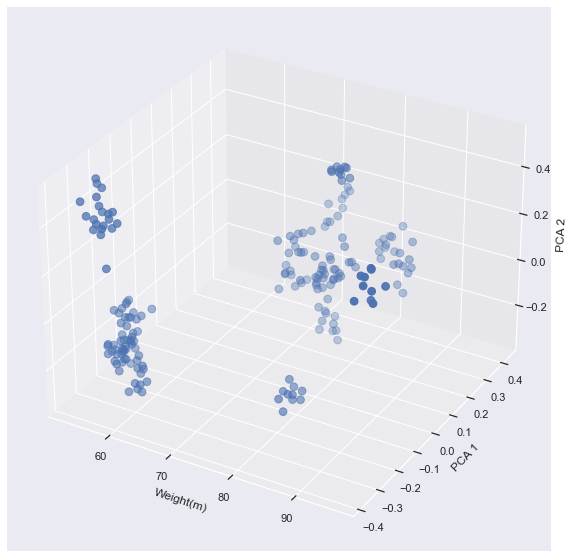

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_weight, pca1, pca2, s=60)
ax.set_xlabel('Weight(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

# Model Creation

Spliting Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test, y_BMI_train, y_BMI_test = train_test_split(X, y_height, y_weight, y_BMI, random_state=1)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def report_goodness(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

Linear Regression

In [18]:
from sklearn import  linear_model

model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.59
Model Performance
Average Error: 0.0236 degrees.
Accuracy = 95.49%.


In [19]:
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_height, X_test, y_weight_test)

Mean squared error: 13.80
Variance score: -442.46
Model Performance
Average Error: 3.7096 degrees.
Accuracy = 12.65%.


In [20]:
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_height, X_test, y_BMI_test)

Mean squared error: 6.97
Variance score: -195.23
Model Performance
Average Error: 2.6306 degrees.
Accuracy = 17.05%.


Ridge Linear Regression

In [21]:
from sklearn.linear_model import Ridge

model_height = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.82
Model Performance
Average Error: 0.0166 degrees.
Accuracy = 96.92%.


In [22]:
model_weight = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.00
Variance score: 0.91
Model Performance
Average Error: 0.0443 degrees.
Accuracy = 98.95%.


In [23]:
model_BMI = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.00
Variance score: 0.90
Model Performance
Average Error: 0.0461 degrees.
Accuracy = 98.52%.


Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.63
Model Performance
Average Error: 0.0223 degrees.
Accuracy = 95.81%.


In [25]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.01
Variance score: 0.70
Model Performance
Average Error: 0.0701 degrees.
Accuracy = 98.37%.


In [26]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.57
Model Performance
Average Error: 0.0899 degrees.
Accuracy = 97.10%.


Kernal Ridge Regression

In [27]:
from sklearn.kernel_ridge import KernelRidge
model_height_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_height_kridge = model_height_kridge.fit(X_train, np.log(y_height_train))
report_goodness(model_height_kridge, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.90
Model Performance
Average Error: 0.0122 degrees.
Accuracy = 97.76%.


In [28]:
model_weight_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_weight_kridge = model_weight_kridge.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight_kridge, X_test, y_weight_test)

Mean squared error: 0.00
Variance score: 0.91
Model Performance
Average Error: 0.0418 degrees.
Accuracy = 99.01%.


In [29]:
model_BMI_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_BMI_kridge = model_BMI_kridge.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI_kridge, X_test, y_BMI_test)

Mean squared error: 0.00
Variance score: 0.91
Model Performance
Average Error: 0.0394 degrees.
Accuracy = 98.73%.


SVR

In [30]:
from sklearn.svm import SVR

model_height=SVR(kernel='rbf')
model_height=model_height.fit(X_train, np.log(y_height_train) )
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: -0.07
Model Performance
Average Error: 0.0449 degrees.
Accuracy = 91.53%.


In [31]:
model_weight=SVR(kernel='rbf')
model_weight=model_weight.fit(X_train, np.log(y_weight_train) )
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.01
Variance score: 0.79
Model Performance
Average Error: 0.0709 degrees.
Accuracy = 98.32%.


In [32]:
model_BMI=SVR(kernel='rbf')
model_BMI=model_BMI.fit(X_train, np.log(y_BMI_train) )
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.01
Variance score: 0.82
Model Performance
Average Error: 0.0653 degrees.
Accuracy = 97.91%.


| Model  | Height Accuracy | Weight Accuracy | BMI Accuracy | 
| --- | --- | --- | --- |
| Linear Regression | 95.49% | 12.65% | 17.05% |
| Ridge Linear Regression | 96.92% | 98.95% | 98.52% |
| Random Forest Regression | 95.81% | 98.37% | 97.10% |
| Kernel Ridge Regression | 97.76% | 99.01% | 98.73% |
| Support Vector Regression | 91.53% | 98.32% | 97.91% |